# Palmer Penguins 

This notebook contains my analysis of the palmer penguins data set.

In [30]:
from palmerpenguins import load_penguins

# Load the palmerpenguins dataset
penguins = load_penguins()

# Display the first few rows of the dataset to verify that it's loaded correctly
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [38]:
# Use fillna function to account for null values

penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(0)
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(0)
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(0)
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(0)
penguins['sex'] = penguins['sex'].fillna('unknown')
penguins['species'] = penguins['species'].fillna('unknown')
penguins['island'] = penguins['island'].fillna('unknown')
penguins['year'] = penguins['year'].fillna('unknown')

# Use .head() to ensure null values have been updated correctly
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,unknown,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [32]:
# Convert certain columns to categories for memory efficiency 

penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')
penguins['year'] = penguins['year'].astype('category')


In [57]:
# Get the total number of penguins

penguin_sum = penguins['species'].value_counts().sum()

# Use value_counts to see the breakdown of species, islands and sex

species_percentage = penguins['species'].value_counts(normalize = True)*100
#Convert new varibale to string so we can add '%'
species_rounded = species_percentage.round().astype(str)+'%'

island_percentage = penguins['island'].value_counts(normalize=True)*100
island_rounded = island_percentage.round().astype(str)+'%'

sex_percentage = penguins['sex'].value_counts(normalize=True)*100
sex_rounded = sex_percentage.round().astype(str)+'%' 

print(f"The total number of penguins is {penguin_sum}, here's a breakdown by species, island and sex:" )
print(species_rounded)

print(island_rounded)

print(sex_rounded)

The total number of penguins is 344, here's a breakdown by species, island and sex:
species
Adelie       44.0%
Gentoo       36.0%
Chinstrap    20.0%
Name: proportion, dtype: object
island
Biscoe       49.0%
Dream        36.0%
Torgersen    15.0%
Name: proportion, dtype: object
sex
male       49.0%
female     48.0%
unknown     3.0%
Name: proportion, dtype: object


# Penguin Distribution 

Among the three species within our dataset, Adelie penguins are the only penguins we see in all three of the islands. This uniform distribution suggests that Adelie penguins are more adaptable when it comes to environmental conditions.

The fact that all Chinstrap penguins are observed exclusively on the island Dream, while all Gentoo penguins inhabit Biscoe Island, further emphasizes the specialization of these species to specific habitats. 

Adelie penguins on average are smaller species compared to Chinstrap and Gentoo which likely works in their favour when it comes to adaptobility in different environments.

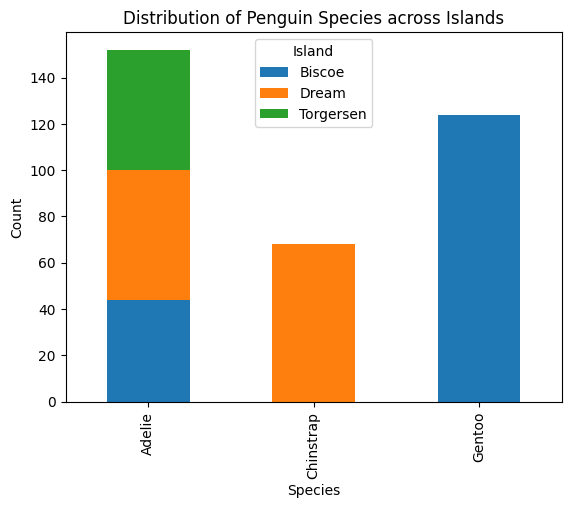

In [3]:
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt

# Load the Palmer Penguin dataset
penguins = load_penguins()

# Aggregate the data to count the occurrences of each species on each island
species_island_counts = penguins.groupby(['species', 'island']).size().unstack(fill_value=0)

# Plot the stacked bar chart
species_island_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Distribution of Penguin Species across Islands")

# Show the plot
plt.legend(title='Island')  # Add legend with the island names
plt.show()



In [35]:
# Use Pandas Groupby function to get the min and max body mass for each penguin

import pandas as pd
from palmerpenguins import load_penguins

# Load the palmerpenguins dataset
penguins = load_penguins()

# Use GroupBy Function to Group different variables together 
min_max_mean_body_mass = penguins.groupby('species')['body_mass_g'].agg(['min', 'max', 'mean']).round(1)
min_max_mean_bill_length_mm = penguins.groupby('species')['bill_length_mm'].agg(['min', 'max', 'mean']).round(1)
min_max_mean_bill_depth_mm = penguins.groupby('species')['bill_length_mm'].agg(['min', 'max', 'mean']).round(1)
min_max_mean_flipper_length_mm = penguins.groupby('species')['bill_length_mm'].agg(['min', 'max', 'mean']).round(1)

print(min_max_mean_body_mass)

              min     max    mean
species                          
Adelie     2850.0  4775.0  3700.7
Chinstrap  2700.0  4800.0  3733.1
Gentoo     3950.0  6300.0  5076.0


https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

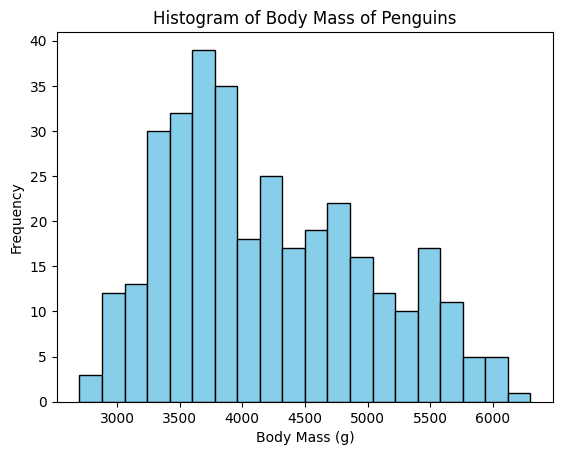

In [28]:
import pandas as pd
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt

# Load penguins data
penguins = load_penguins()

# Select the 'body_mass_g' variable
body_mass = penguins['body_mass_g']

# Create the histogram - Bins is the number of intervals in the histogram 
plt.hist(body_mass, bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram of Body Mass of Penguins')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Pearson Correlation Coefficient

https://seaborn.pydata.org/tutorial/introduction.html

The correlation coefficient culculated using Pearson's correlation method is 0.87. This indicates that there is a strong relationship between flipper length and body mass meaning that as flipper length increases, body mass tends to do the same.

The scatter plot is used to further visualise the relationship between the two variables.

Other correlation methods include Spearman's rank correlation for assessing monotonic relationships and Kendall's tau for measuring ordinal associations. However, Pearson's correlation is ideal when exploring linear relationships.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/#:~:text=There%20are%20two%20main%20types,types%20of%20variables%20being%20studied.

Correlation coefficient: 0.87


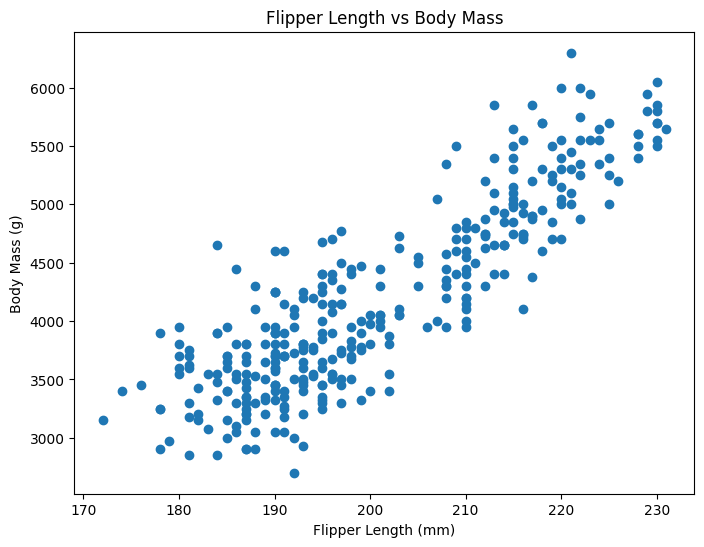

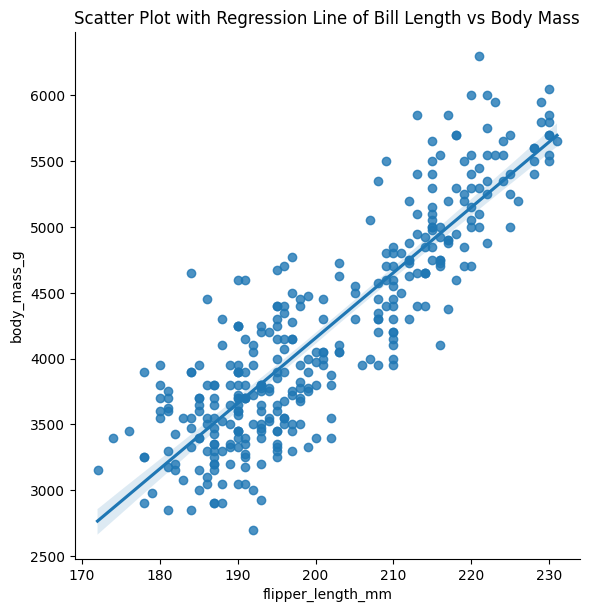

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins

# Load the palmerpenguins dataset
penguins = load_penguins()

# Compute correlation - .corr automatiaclly applies Pearson's theory
correlation = penguins['flipper_length_mm'].corr(penguins['body_mass_g']).round(2)
print("Correlation coefficient:", correlation)

# Visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

# Seaborn scatter plot with regression line
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=penguins, height=6)
plt.title('Scatter Plot with Regression Line of Bill Length vs Body Mass')
plt.show()